In [2]:
import uodp
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

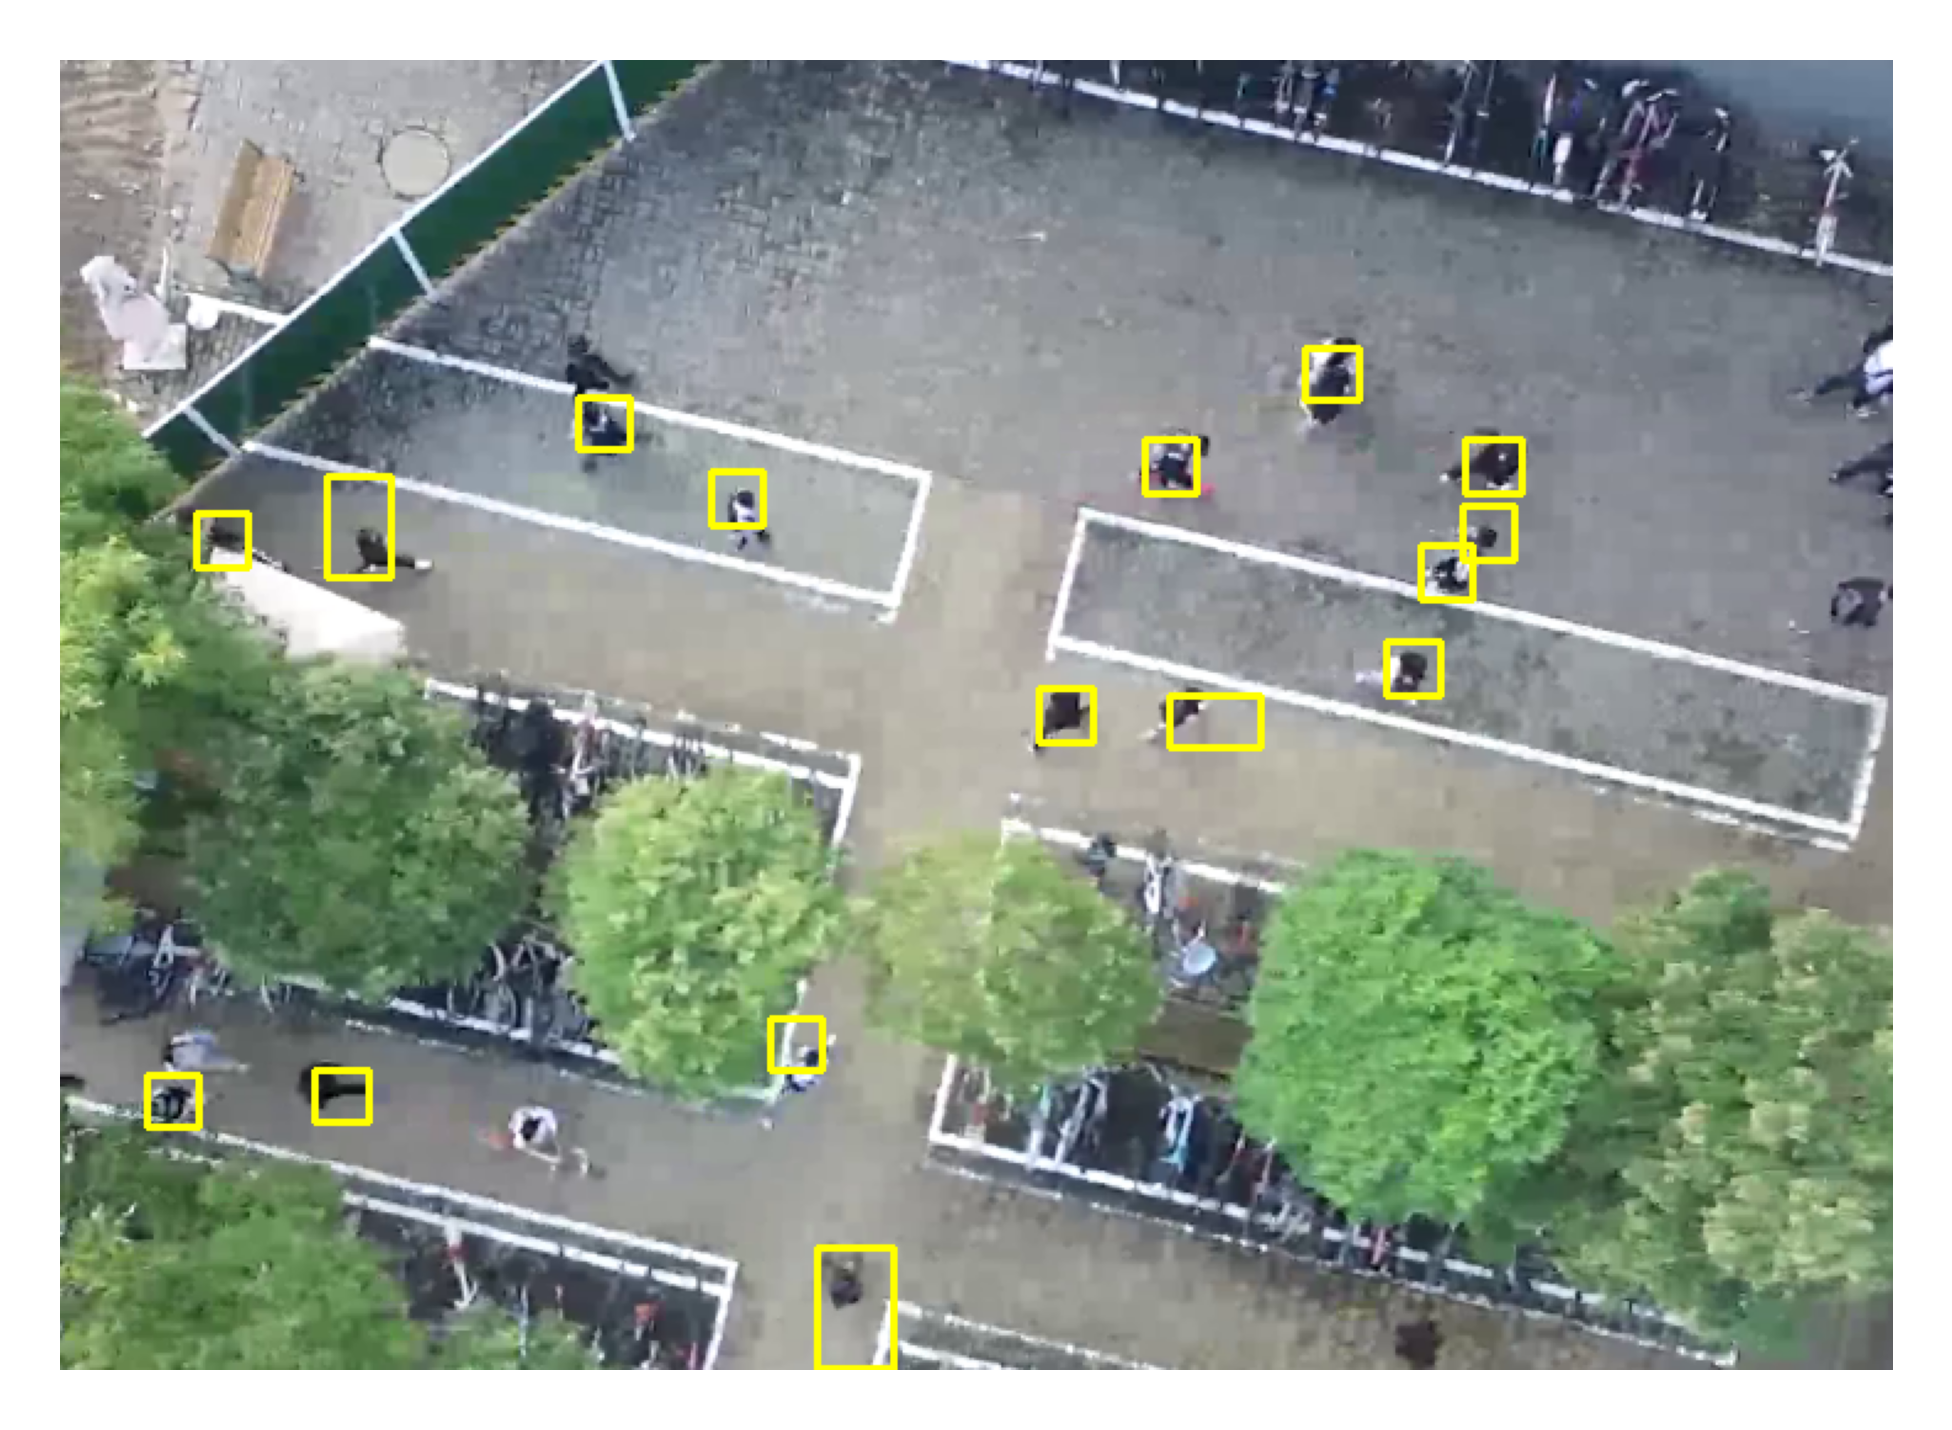

In [13]:
img = cv2.imread(r"./test_imgs/0.png")
img = cv2.resize(img,None,(0,0),fx=0.5,fy=0.5)
outs = uodp.detect(
    img,
    radius_bound=32,
    ksize_bed=65,
    threshold_det=100,
    ksize_sp=1,
    ksize_find=4,
    db_eps=10,
    db_samples=10,
    threshold_iou=0.1,
    )
# outs: [h1,w1,h2,w2]

if len(outs) > 0:
    outs = outs.astype('int')
else:
    outs = np.array([[0,0,0,0]],dtype='int')

res = deepcopy(img)
for i,out in enumerate(outs):
    color = (0,255,255)
    res = cv2.rectangle(res,
                        out[0:2],
                        out[2:4],
                        color=color,
                        thickness=2)
    
plt.close()
fig = plt.figure(figsize=(788/200,1080/200),dpi=600)
ax = fig.add_subplot(1,1,1)
ax.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))
ax.set_axis_off()
plt.show()